In [2]:
# Steps
# 1: Input Image
# 2: input spline coords
# 3. Plot parametric lines on image
# 4. 

In [61]:
import cv2 

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
img = cv2.imread('englishmansbay.jpg')

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [35]:
# Spleen 1
s1p1 = [3115, 1910];
s1p2 = [2919, 1826];
s1p3 = [2815, 1794];
s1p4 = [2671, 1750];
s1p5 = [2499, 1722];
s1p6 = [2351, 1698];

sl_x = [s1p1[0], s1p2[0], s1p3[0], s1p4[0], s1p5[0], s1p6[0]];
sl_y = [s1p1[1], s1p2[1], s1p3[1], s1p4[1], s1p5[1], s1p6[1]];

sl = np.column_stack((s1_x, s1_y));

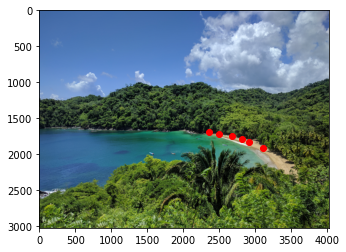

In [74]:
# Plot Spleen on image
plt.plot(s1_x, sl_y, 'o', color="red")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [71]:
# Spline can be represented as set of parametric equations
# Fit line to x coordinates
x = [1, 2, 3, 4, 5, 6]

coefficients_x = np.polyfit(x, sl_x, 2);
p_x = np.poly1d(coefficients_x);

In [72]:
# Fit line to y coordinates
coefficients_y = np.polyfit(x, sl_y, 2);
p_y = np.poly1d(coefficients_y);

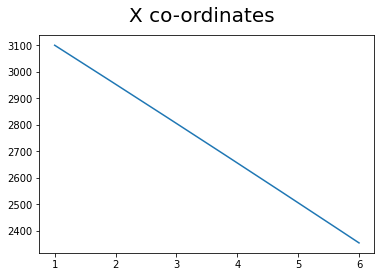

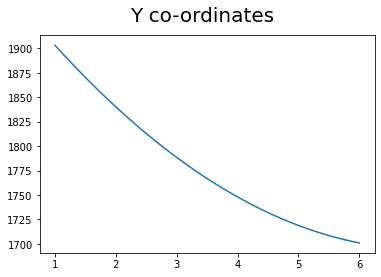

In [73]:
# Plot x and y coordinates as parametrix equations
t = np.linspace(1, 6, 200)

fig = plt.figure()
plt.plot(t, p_x(t), '-')
fig.suptitle('X co-ordinates', fontsize=20)
plt.show()

fig = plt.figure()
plt.plot(t, p_y(t), '-')
fig.suptitle('Y co-ordinates', fontsize=20)
plt.show()

In [114]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[rows, cols] = img_gray.shape

# Create image-size matrixes for x coordinates and y coordinates
X = np.ones((rows,1)) * np.arange(1,cols+1)

rows_range = np.arange(1,rows+1)[:, np.newaxis]
Y = rows_range * np.ones(cols)


# coords = [X(:)'; Y(:)'];

array([[1.000e+00, 2.000e+00, 3.000e+00, ..., 4.029e+03, 4.030e+03,
        4.031e+03],
       [1.000e+00, 2.000e+00, 3.000e+00, ..., 4.029e+03, 4.030e+03,
        4.031e+03],
       [1.000e+00, 2.000e+00, 3.000e+00, ..., 4.029e+03, 4.030e+03,
        4.031e+03],
       ...,
       [1.000e+00, 2.000e+00, 3.000e+00, ..., 4.029e+03, 4.030e+03,
        4.031e+03],
       [1.000e+00, 2.000e+00, 3.000e+00, ..., 4.029e+03, 4.030e+03,
        4.031e+03],
       [1.000e+00, 2.000e+00, 3.000e+00, ..., 4.029e+03, 4.030e+03,
        4.031e+03]])

In [223]:
Y

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       [3.000e+00, 3.000e+00, 3.000e+00, ..., 3.000e+00, 3.000e+00,
        3.000e+00],
       ...,
       [3.022e+03, 3.022e+03, 3.022e+03, ..., 3.022e+03, 3.022e+03,
        3.022e+03],
       [3.023e+03, 3.023e+03, 3.023e+03, ..., 3.023e+03, 3.023e+03,
        3.023e+03],
       [3.024e+03, 3.024e+03, 3.024e+03, ..., 3.024e+03, 3.024e+03,
        3.024e+03]])